 **Implementation of Paper 2**


*   Using ExtraTreesClassifier
*  min_samples_leaf = 7, min_samples_split = 2, n_estimators = 100
*   70-30 test split
*   evaluated on precision, recall and f1-score
* all categorical features will be label encoded
* based off the papers feature selection we will remove the features reservation_status, reservation_status_date, children, and babies.





In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

source_file = 'hotel_bookings.csv'
data = pd.read_csv(source_file)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


all NaN values will be converted to datatypes usable by ExtraTrees

In [21]:
le = LabelEncoder()
data[data.select_dtypes(include = ['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

data.company.fillna(value = 0, inplace = True)
data.agent.fillna(value = 0, inplace = True)
data.children.fillna(value = 0, inplace = True)
data.country.fillna(value = 0, inplace = True)

features = data.drop(['is_canceled','reservation_status','children','babies','reservation_status_date'],1)
labels = data['is_canceled']
print(features.shape, labels.shape)

(119390, 27) (119390,)


<ipython-input-21-34ceb8091b3f>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = data.drop(['is_canceled','reservation_status','children','babies','reservation_status_date'],1)


In paper the X train and test and standardized using the standard scaler

In [22]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.3, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)
print("Train Shape: ", y_train.shape)
print("Test Shape: ", y_test.shape)

Train Shape:  (83573, 27)
Test Shape:  (35817, 27)
Train Shape:  (83573,)
Test Shape:  (35817,)


In [24]:
ET = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split = 2, n_estimators = 100)
ET.fit(X_train, y_train)
y_pred = ET.predict(X_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1 Score: ', f1)

Accuracy:  0.8645615210654158
Recall:  0.7123308047002826
Precision:  0.9069216930214942
F1 Score:  0.7979339359353522


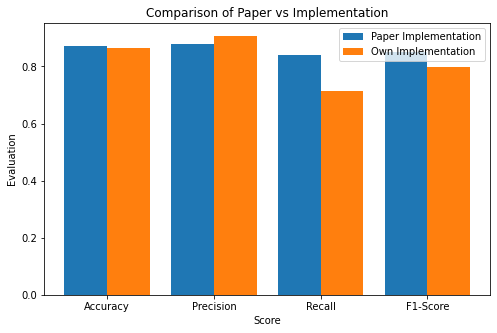

In [26]:
x = ['Accuracy','Precision','Recall','F1-Score']
y_paper = [0.87,0.88,0.84,0.85]
y_own = [acc,prec,rec,f1]
  
x_axis = np.arange(len(x))

plt.figure(figsize = (8, 5))

plt.bar(x_axis - 0.2, y_paper, 0.4, label = 'Paper Implementation')
plt.bar(x_axis + 0.2, y_own, 0.4, label = 'Own Implementation')

plt.xticks(x_axis, x)
plt.xlabel("Score")
plt.ylabel("Evaluation")
plt.title("Comparison of Paper vs Implementation")
plt.legend()
plt.show()
